**Import modules + libraries**

In [193]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [194]:
# Import the libraries
import functions
import dictionaries

In [195]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Read in the tracks data (pandas dataframe from Save/Track.h5) + convert to datetime to make it easier to use**

In [197]:
#read in the Track.h5 file to a pandas dataframe
mcstracks_225=pd.read_hdf('Save/Jan_2000/singleTb/Track_225.h5','table')
mcstracks_230=pd.read_hdf('Save/Jan_2000/singleTb/Track_230.h5','table')
mcstracks_235=pd.read_hdf('Save/Jan_2000/singleTb/Track_235.h5','table')
mcstracks_240=pd.read_hdf('Save/Jan_2000/singleTb/Track_240.h5','table')
mcstracks_241=pd.read_hdf('Save/Jan_2000/singleTb/Track_241.h5','table')
mcstracks_245=pd.read_hdf('Save/Jan_2000/singleTb/Track_245.h5','table')

#convert ['timestr'] column to datetime in dataframe
mcstracks_225.timestr=mcstracks_225.timestr.astype(str)
mcstracks_225['datetime'] = pd.to_datetime(mcstracks_225.timestr.str.split(',\s*').str[0])
set(mcstracks_225['datetime'])

mcstracks_230.timestr=mcstracks_230.timestr.astype(str)
mcstracks_230['datetime'] = pd.to_datetime(mcstracks_230.timestr.str.split(',\s*').str[0])
set(mcstracks_230['datetime'])

mcstracks_235.timestr=mcstracks_235.timestr.astype(str)
mcstracks_235['datetime'] = pd.to_datetime(mcstracks_235.timestr.str.split(',\s*').str[0])
set(mcstracks_235['datetime'])

mcstracks_240.timestr=mcstracks_240.timestr.astype(str)
mcstracks_240['datetime'] = pd.to_datetime(mcstracks_240.timestr.str.split(',\s*').str[0])
set(mcstracks_240['datetime'])

mcstracks_241.timestr=mcstracks_241.timestr.astype(str)
mcstracks_241['datetime'] = pd.to_datetime(mcstracks_241.timestr.str.split(',\s*').str[0])
set(mcstracks_241['datetime'])

mcstracks_245.timestr=mcstracks_245.timestr.astype(str)
mcstracks_245['datetime'] = pd.to_datetime(mcstracks_245.timestr.str.split(',\s*').str[0])
set(mcstracks_245['datetime'])

{Timestamp('2005-01-01 00:30:00'),
 Timestamp('2005-01-01 01:30:00'),
 Timestamp('2005-01-01 02:30:00'),
 Timestamp('2005-01-01 03:30:00'),
 Timestamp('2005-01-01 04:30:00'),
 Timestamp('2005-01-01 05:30:00'),
 Timestamp('2005-01-01 06:30:00'),
 Timestamp('2005-01-01 07:30:00'),
 Timestamp('2005-01-01 08:30:00'),
 Timestamp('2005-01-01 09:30:00'),
 Timestamp('2005-01-01 10:30:00'),
 Timestamp('2005-01-01 11:30:00'),
 Timestamp('2005-01-01 12:30:00'),
 Timestamp('2005-01-01 13:30:00'),
 Timestamp('2005-01-01 14:30:00'),
 Timestamp('2005-01-01 15:30:00'),
 Timestamp('2005-01-01 16:30:00'),
 Timestamp('2005-01-01 17:30:00'),
 Timestamp('2005-01-01 18:30:00'),
 Timestamp('2005-01-01 19:30:00'),
 Timestamp('2005-01-01 20:30:00'),
 Timestamp('2005-01-01 21:30:00'),
 Timestamp('2005-01-01 22:30:00'),
 Timestamp('2005-01-01 23:30:00'),
 Timestamp('2005-01-02 00:30:00'),
 Timestamp('2005-01-02 01:30:00'),
 Timestamp('2005-01-02 02:30:00'),
 Timestamp('2005-01-02 03:30:00'),
 Timestamp('2005-01-

In [198]:
mcstracks_225

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell,datetime
0,0,4,179.952719,506.900175,2364,225,1,2005-01-01 00:30:00,2005-01-01 00:30:00,-32.751965,-64.510482,295.489518,295.489518,-1,0 days 00:00:00,2005-01-01 00:30:00
1,0,12,293.184274,850.498843,2050,225,2,2005-01-01 00:30:00,2005-01-01 00:30:00,-28.166087,-50.594758,309.405242,309.405242,-1,0 days 00:00:00,2005-01-01 00:30:00
2,0,37,543.961483,771.215527,4716,225,3,2005-01-01 00:30:00,2005-01-01 00:30:00,-18.009611,-53.805725,306.194275,306.194275,-1,0 days 00:00:00,2005-01-01 00:30:00
3,0,57,608.065492,542.405896,2379,225,4,2005-01-01 00:30:00,2005-01-01 00:30:00,-15.413398,-63.072521,296.927479,296.927479,-1,0 days 00:00:00,2005-01-01 00:30:00
4,0,76,733.115621,789.437522,11502,225,5,2005-01-01 00:30:00,2005-01-01 00:30:00,-10.348867,-53.067731,306.932269,306.932269,-1,0 days 00:00:00,2005-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,743,204,878.664848,682.122748,4167,225,6311,2005-01-31 23:30:00,2005-01-31 23:30:00,-4.454124,-57.413974,302.586026,302.586026,-1,30 days 23:00:00,2005-01-31 23:30:00
6311,743,212,925.939829,963.672542,3980,225,6312,2005-01-31 23:30:00,2005-01-31 23:30:00,-2.539489,-46.011216,313.988784,313.988784,-1,30 days 23:00:00,2005-01-31 23:30:00
6312,743,237,1025.357183,1240.931039,6893,225,6313,2005-01-31 23:30:00,2005-01-31 23:30:00,1.486916,-34.782242,325.217758,325.217758,-1,30 days 23:00:00,2005-01-31 23:30:00
6313,743,252,1072.298989,1302.670402,7403,225,6314,2005-01-31 23:30:00,2005-01-31 23:30:00,3.388059,-32.281790,327.718210,327.718210,1495,0 days 15:00:00,2005-01-31 23:30:00


**Analysis for initiation and dissipation of MCSs**

In [199]:
#225K threshold
init_hours_225 = functions.get_mcs_init(mcstracks_225)
init_hours_225 = np.array(init_hours_225)
init_hours_225, bins = np.histogram(init_hours_225, bins = np.arange(0,25))

diss_hours_225 = functions.get_mcs_diss(mcstracks_225)
diss_hours_225 = np.array(diss_hours_225)
diss_hours_225, bins = np.histogram(diss_hours_225, bins = np.arange(0,25))

init_225 = init_hours_225/np.nansum(init_hours_225) * 100
diss_225 = diss_hours_225/np.nansum(diss_hours_225) * 100

#230K threshold
init_hours_230 = functions.get_mcs_init(mcstracks_230)
init_hours_230 = np.array(init_hours_230)
init_hours_230, bins = np.histogram(init_hours_230, bins = np.arange(0,25))

diss_hours_230 = functions.get_mcs_diss(mcstracks_230)
diss_hours_230 = np.array(diss_hours_230)
diss_hours_230, bins = np.histogram(diss_hours_230, bins = np.arange(0,25))

init_230 = init_hours_230/np.nansum(init_hours_230) * 100
diss_230 = diss_hours_230/np.nansum(diss_hours_230) * 100

#235K threshold
init_hours_235 = functions.get_mcs_init(mcstracks_235)
init_hours_235 = np.array(init_hours_235)
init_hours_235, bins = np.histogram(init_hours_235, bins = np.arange(0,25))

diss_hours_235 = functions.get_mcs_diss(mcstracks_235)
diss_hours_235 = np.array(diss_hours_235)
diss_hours_235, bins = np.histogram(diss_hours_235, bins = np.arange(0,25))

init_235 = init_hours_235/np.nansum(init_hours_235) * 100
diss_235 = diss_hours_235/np.nansum(diss_hours_235) * 100

#240K threshold
init_hours_240 = functions.get_mcs_init(mcstracks_240)
init_hours_240 = np.array(init_hours_240)
init_hours_240, bins = np.histogram(init_hours_240, bins = np.arange(0,25))

diss_hours_240 = functions.get_mcs_diss(mcstracks_240)
diss_hours_240 = np.array(diss_hours_240)
diss_hours_240, bins = np.histogram(diss_hours_240, bins = np.arange(0,25))

init_240 = init_hours_240/np.nansum(init_hours_240) * 100
diss_240 = diss_hours_240/np.nansum(diss_hours_240) * 100

#241K threshold
init_hours_241 = functions.get_mcs_init(mcstracks_241)
init_hours_241 = np.array(init_hours_241)
init_hours_241, bins = np.histogram(init_hours_241, bins = np.arange(0,25))

diss_hours_241 = functions.get_mcs_diss(mcstracks_241)
diss_hours_241 = np.array(diss_hours_241)
diss_hours_241, bins = np.histogram(diss_hours_241, bins = np.arange(0,25))

init_241 = init_hours_241/np.nansum(init_hours_241) * 100
diss_241 = diss_hours_241/np.nansum(diss_hours_241) * 100

#245K threshold
init_hours_245 = functions.get_mcs_init(mcstracks_245)
init_hours_245 = np.array(init_hours_245)
init_hours_245, bins = np.histogram(init_hours_245, bins = np.arange(0,25))

diss_hours_245 = functions.get_mcs_diss(mcstracks_245)
diss_hours_245 = np.array(diss_hours_245)
diss_hours_245, bins = np.histogram(diss_hours_245, bins = np.arange(0,25))

init_245 = init_hours_245/np.nansum(init_hours_245) * 100
diss_245 = diss_hours_245/np.nansum(diss_hours_245) * 100


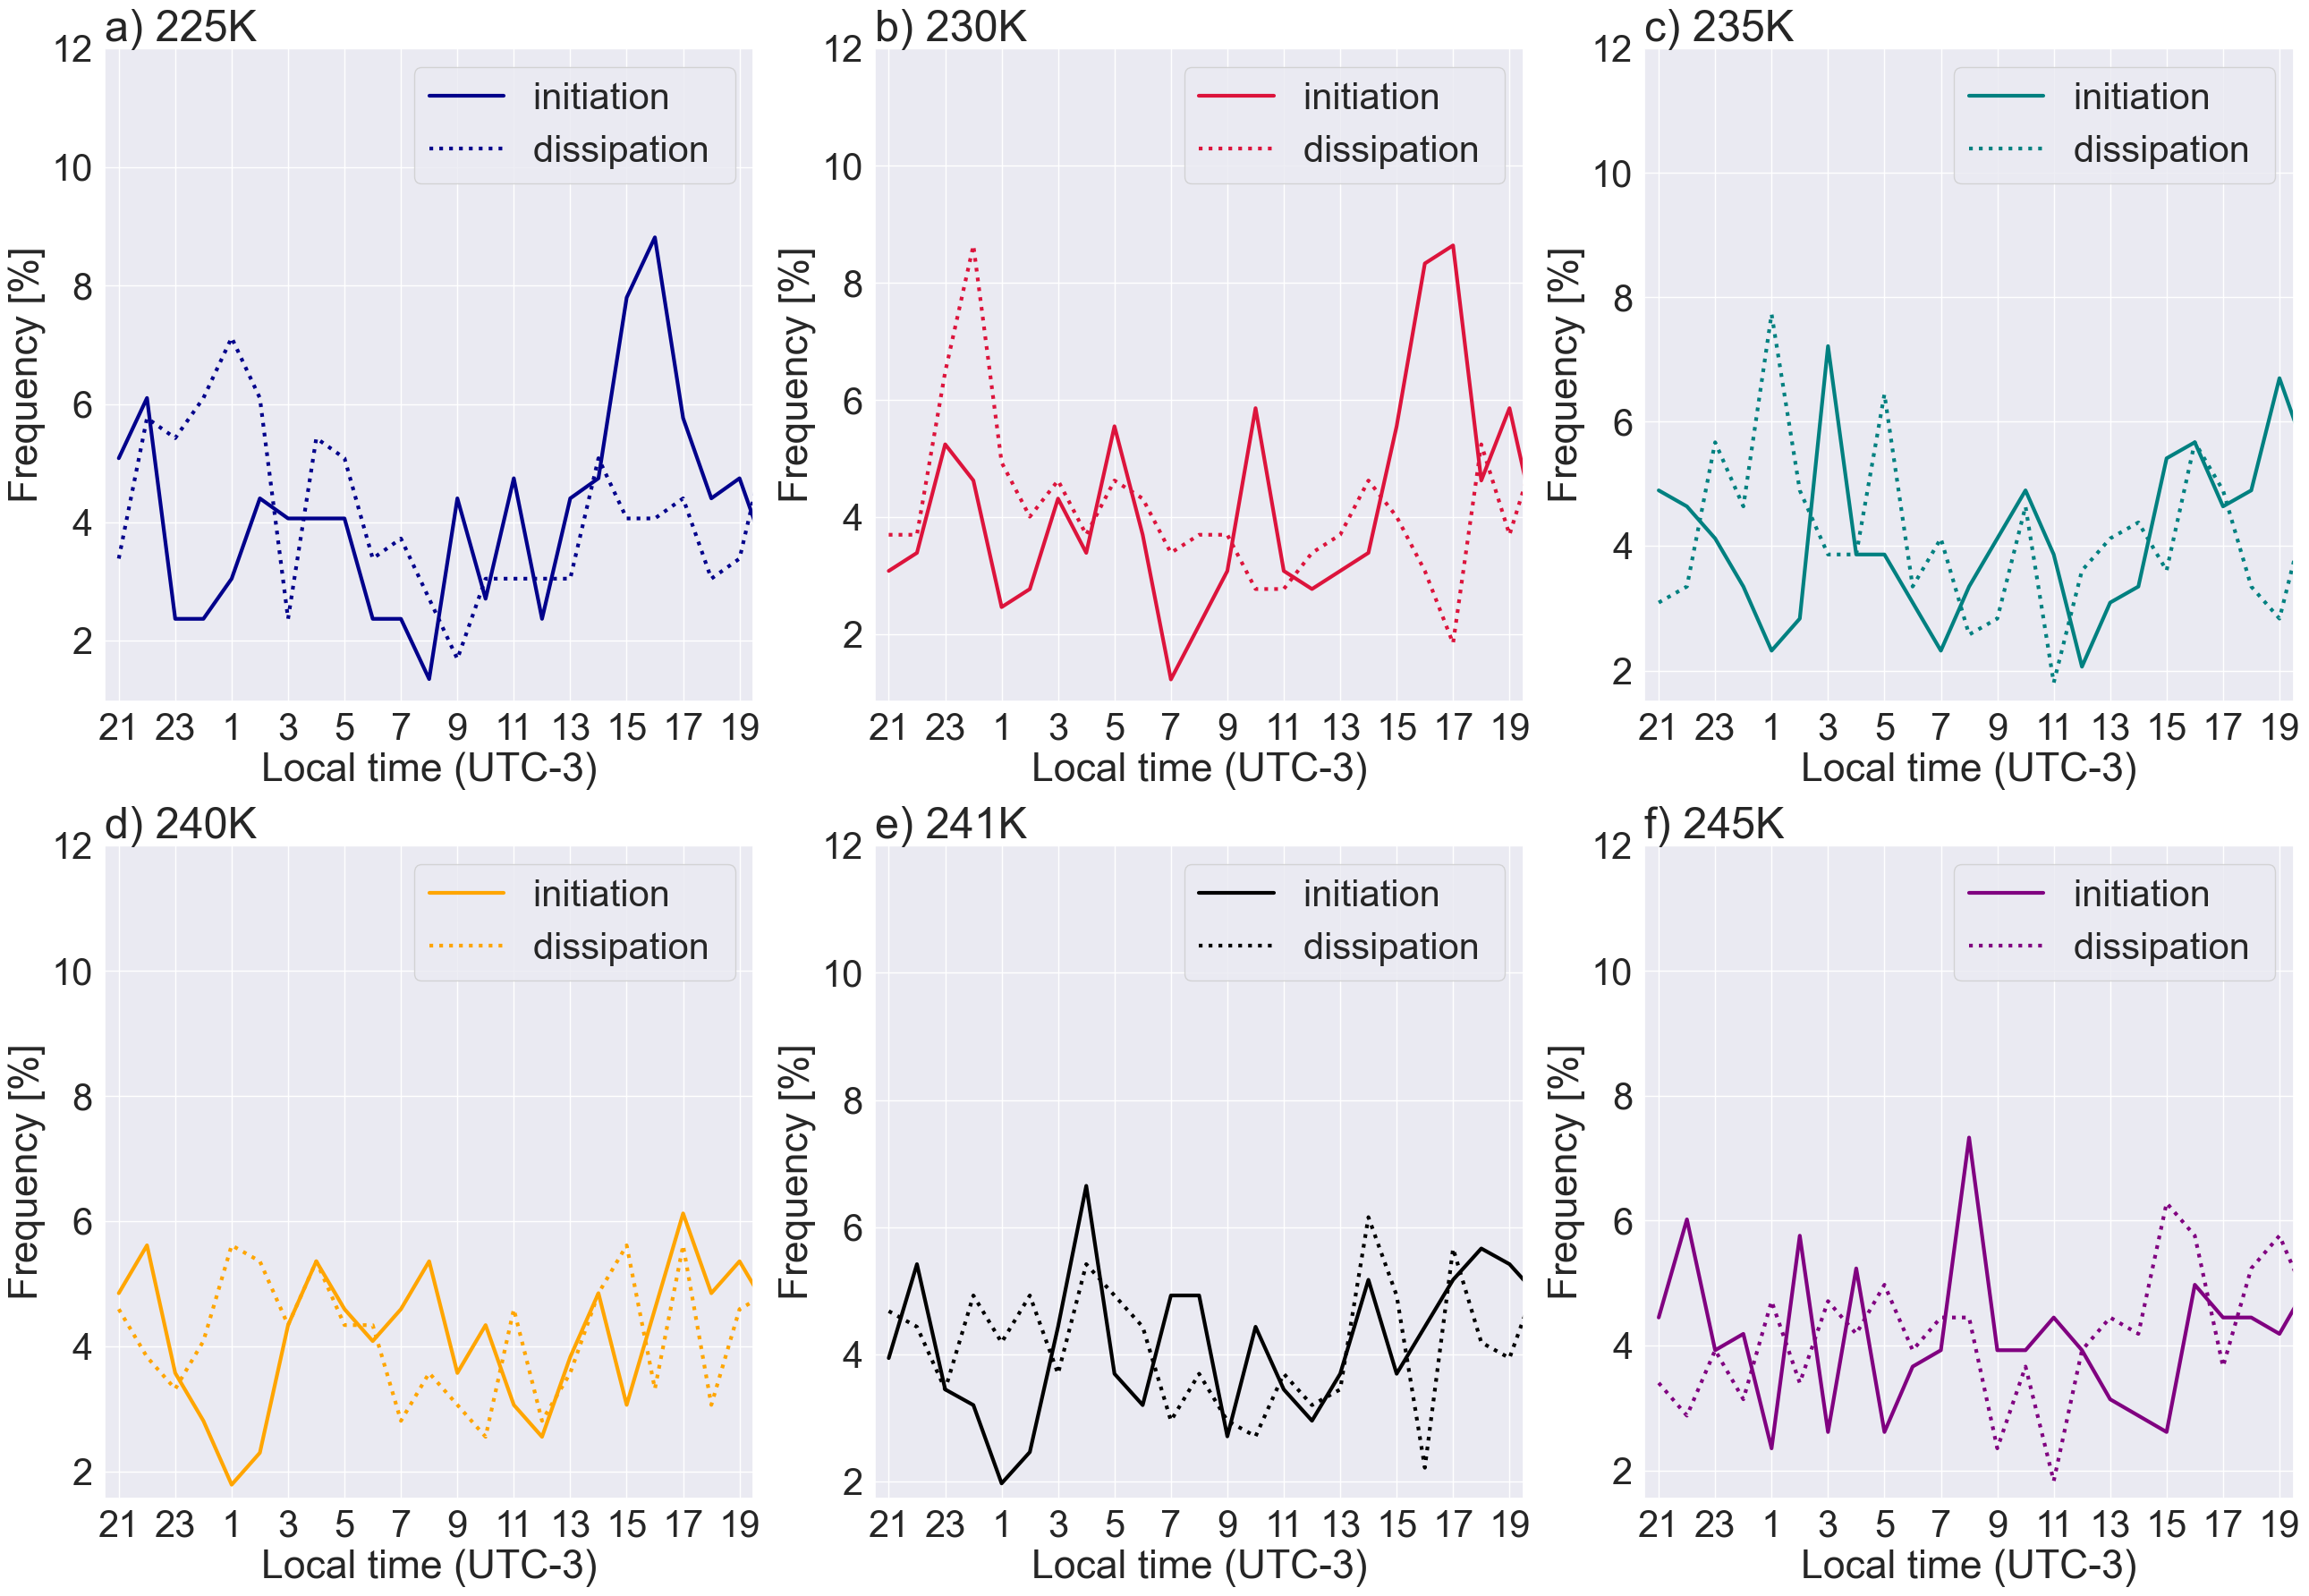

In [200]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,18))
f= 30
lf= 30
l=32

ax1 = plt.subplot(2, 3, 1) 
ax1.set_title('a) 225K ', loc='left', fontsize= 35 )
ax1.plot(np.arange(0,24), init_225, label = 'initiation ', color= 'darkblue', linewidth = 3)
ax1.plot(np.arange(0,24), diss_225, label = 'dissipation ', color= 'darkblue', linewidth = 3, linestyle = 'dotted')
ax1.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
ax1.set_yticks(np.arange(2,14,2))
ax1.set_xticks(np.arange(0,23)[::2])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=f)
ax1.set_xticklabels(labels,fontsize= f)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Local time (UTC-3)', fontsize= l)
ax1.set_ylabel('Frequency [%]', fontsize= l)

labels=localtime.astype(str)
ax2 = plt.subplot(2, 3, 2) 
ax2.set_title('b) 230K ', loc='left', fontsize= 35 )
ax2.plot(np.arange(0,24), init_230, label = 'initiation ', color= 'crimson', linewidth = 3)
ax2.plot(np.arange(0,24), diss_230, label = 'dissipation ', color= 'crimson', linewidth = 3, linestyle = 'dotted')
ax2.legend(fontsize=lf)
ax2.set_yticks(np.arange(2,14,2))
ax2.set_xticks(np.arange(0,23)[::2])
ax2.set_xticklabels(labels,fontsize= f)
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=f)
ax2.set_xlabel('Local time (UTC-3)', fontsize= l)
ax2.set_ylabel('Frequency [%]', fontsize= l)

ax3 = plt.subplot(2, 3, 3) 
ax3.set_title('c) 235K ', loc='left', fontsize= 35 )
ax3.plot(np.arange(0,24), init_235, label = 'initiation ', color= 'teal', linewidth = 3)
ax3.plot(np.arange(0,24), diss_235, label = 'dissipation ', color= 'teal', linewidth = 3, linestyle = 'dotted')
ax3.legend(fontsize=lf)
ax3.set_yticks(np.arange(2,14,2))
ax3.set_xticks(np.arange(0,23)[::2])
ax3.set_yticklabels(ax3.get_yticks(),fontsize=f)
ax3.set_xticklabels(labels,fontsize= f)
ax3.set_xlim(-0.5,22.5)
ax3.set_xlabel('Local time (UTC-3)', fontsize= l)
ax3.set_ylabel('Frequency [%]', fontsize= l)

ax4 = plt.subplot(2, 3, 4) 
ax4.set_title('d) 240K ', loc='left', fontsize= 35 )
ax4.plot(np.arange(0,24), init_240, label = 'initiation ', color= 'orange', linewidth = 3)
ax4.plot(np.arange(0,24), diss_240, label = 'dissipation ', color= 'orange', linewidth = 3, linestyle = 'dotted')
ax4.legend(fontsize=lf)
ax4.set_yticks(np.arange(2,14,2))
ax4.set_xticks(np.arange(0,23)[::2])
ax4.set_yticklabels(ax4.get_yticks(),fontsize=f)
ax4.set_xticklabels(labels,fontsize= f)
ax4.set_xlim(-0.5,22.5)
ax4.set_xlabel('Local time (UTC-3)', fontsize= l)
ax4.set_ylabel('Frequency [%]', fontsize= l)

ax5 = plt.subplot(2, 3, 5) 
ax5.set_title('e) 241K ', loc='left', fontsize= 35 )
ax5.plot(np.arange(0,24), init_241, label = 'initiation ', color= 'black', linewidth = 3)
ax5.plot(np.arange(0,24), diss_241, label = 'dissipation ', color= 'black', linewidth = 3, linestyle = 'dotted')
ax5.legend(fontsize=lf)
ax5.set_yticks(np.arange(2,14,2))
ax5.set_xticks(np.arange(0,23)[::2])
ax5.set_yticklabels(ax5.get_yticks(),fontsize=f)
ax5.set_xticklabels(labels,fontsize= f)
ax5.set_xlim(-0.5,22.5)
ax5.set_xlabel('Local time (UTC-3)', fontsize= l)
ax5.set_ylabel('Frequency [%]', fontsize= l)

ax6 = plt.subplot(2, 3, 6) 
ax6.set_title('f) 245K ', loc='left', fontsize= 35 )
ax6.plot(np.arange(0,24), init_245, label = 'initiation ', color= 'purple', linewidth = 3)
ax6.plot(np.arange(0,24), diss_245, label = 'dissipation ', color= 'purple', linewidth = 3, linestyle = 'dotted')
ax6.legend(fontsize=lf)
ax6.set_yticks(np.arange(2,14,2))
ax6.set_xticks(np.arange(0,23)[::2])
ax6.set_yticklabels(ax6.get_yticks(),fontsize=f)
ax6.set_xticklabels(labels,fontsize= f)
ax6.set_xlim(-0.5,22.5)
ax6.set_xlabel('Local time (UTC-3)', fontsize= l)
ax6.set_ylabel('Frequency [%]', fontsize= l)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/singleTb/Init_diss_Tb_thresholds_Jan2000.png')



In [201]:
init_lats_225, init_lons_225, diss_lats_225, diss_lons_225 = functions.get_init(mcstracks_225)
init_lats_230, init_lons_230, diss_lats_230, diss_lons_230 = functions.get_init(mcstracks_230)
init_lats_235, init_lons_235, diss_lats_235, diss_lons_235 = functions.get_init(mcstracks_235)
init_lats_240, init_lons_240, diss_lats_240, diss_lons_240 = functions.get_init(mcstracks_240)
init_lats_241, init_lons_241, diss_lats_241, diss_lons_241 = functions.get_init(mcstracks_241)
init_lats_245, init_lons_245, diss_lats_245, diss_lons_245 = functions.get_init(mcstracks_245)




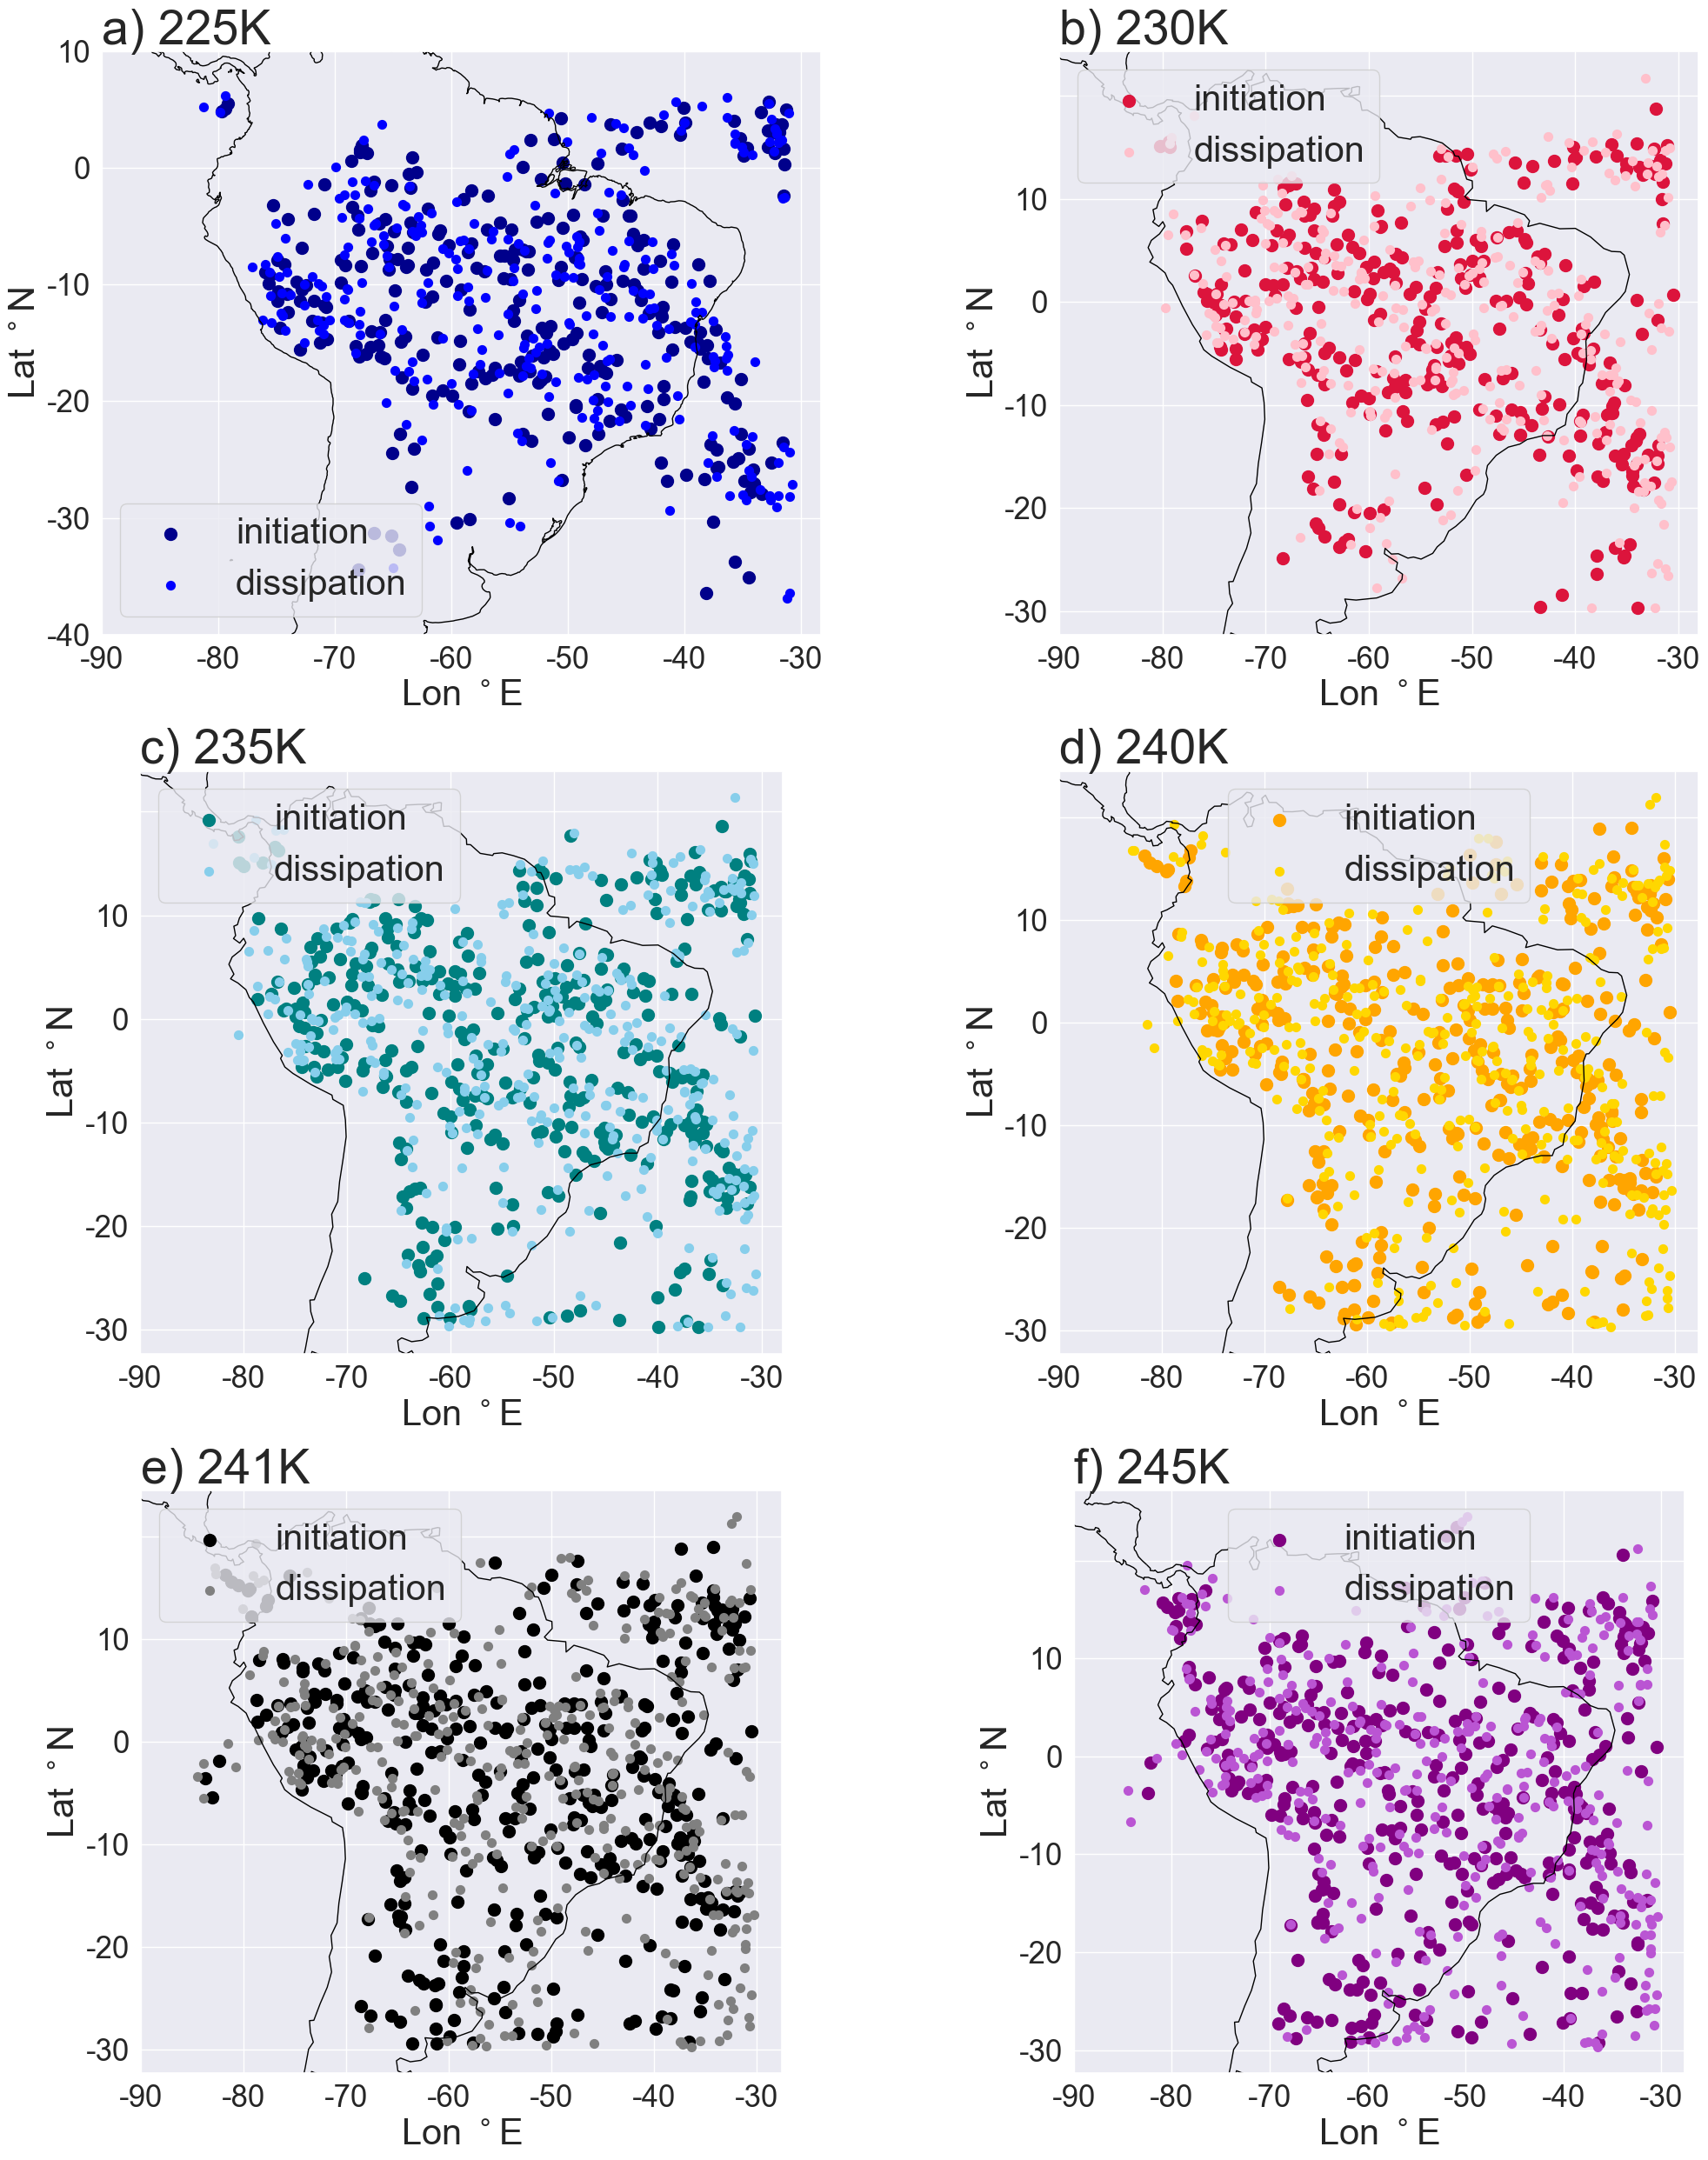

In [202]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(22,25))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
#fontsize
f=40

plt.subplots_adjust(wspace=0,hspace=0)
# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(3, 2, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) 225K ', loc='left', fontsize= f )
ax1.scatter(init_lons_225, init_lats_225,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_225, diss_lats_225,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
ax1.legend(fontsize= 30)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax2 = plt.subplot(3, 2, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) 230K ', loc='left', fontsize= f )
ax2.scatter(init_lons_230, init_lats_230,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_230, diss_lats_230,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines()
ax2.legend(fontsize= 30)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax3 = plt.subplot(3, 2, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) 235K ', loc='left', fontsize= f )
ax3.scatter(init_lons_235, init_lats_235,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_235, diss_lats_235,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
ax3.legend(fontsize= 30)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax4 = plt.subplot(3, 2, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) 240K ', loc='left', fontsize= f )
ax4.scatter(init_lons_240, init_lats_240,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_240, diss_lats_240,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.coastlines()
ax4.legend(fontsize= 30)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax5 = plt.subplot(3, 2, 5, projection=ccrs.PlateCarree())
ax5.set_title('e) 241K ', loc='left', fontsize= f )
ax5.scatter(init_lons_241, init_lats_241,  color='black',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax5.scatter(diss_lons_241, diss_lats_241,  color='grey',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax5.coastlines()
ax5.legend(fontsize= 30)
ax5.set_xticks(xlabels, xlabels)
ax5.set_yticks(ylabels,ylabels)
ax5.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax5.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax5.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax6 = plt.subplot(3, 2, 6, projection=ccrs.PlateCarree())
ax6.set_title('f) 245K ', loc='left', fontsize= f )
ax6.scatter(init_lons_245, init_lats_245,  color='purple',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax6.scatter(diss_lons_245, diss_lats_245,  color='mediumorchid',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax6.coastlines()
ax6.legend(fontsize= 30)
ax6.set_xticks(xlabels, xlabels)
ax6.set_yticks(ylabels,ylabels)
ax6.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax6.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax6.set_ylabel('Lat $^\circ$N',  fontsize=30)

fig.tight_layout()

plt.savefig('Plot/Jan_2000/singleTb/Init_diss_loc_Tb_thresholds_Jan2000.png')


**MCS area analysis (converts from grid points to area (km2) within function)**

In [203]:
area_225=functions.get_area(mcstracks_225)
area_230=functions.get_area(mcstracks_230)
area_235=functions.get_area(mcstracks_235)
area_240=functions.get_area(mcstracks_240)
area_241=functions.get_area(mcstracks_241)
area_245=functions.get_area(mcstracks_245)


array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.


In [204]:
print(area_225)

[114022.0129636   83754.          60156.96428571  79145.67857143
 256978.76785714 282188.42307692  89681.46428571 122040.675
  53283.53571429 172067.36538462 132995.925      133999.3125
 146646.          97058.25        83210.14285714  62422.07142857
 185027.14285714 187344.32142857 167869.60714286  82160.03571429
  50995.28571429  85870.125      207647.18181818 277866.45
 220772.25       304861.90909091  68855.52272727 141980.21052632
 171966.375      149184.64285714 230832.64285714 191387.08928571
 106494.75       295113.375      104572.6875     193581.9
  95634.96428571 213552.81818182 292586.72727273 131008.82142857
 265164.54545455 108009.16071429 197187.13636364 119325.65625
  59560.3125     104744.50568182 105711.328125   108922.5
  56781.          85310.35714286 113761.60714286 120347.775
 124593.1875     171143.65384615 178351.875      139396.95
  63003.53571429  74153.475      169355.25        79212.21428571
 167325.75       232594.03125    144613.92857143  94020.75
  91959.9

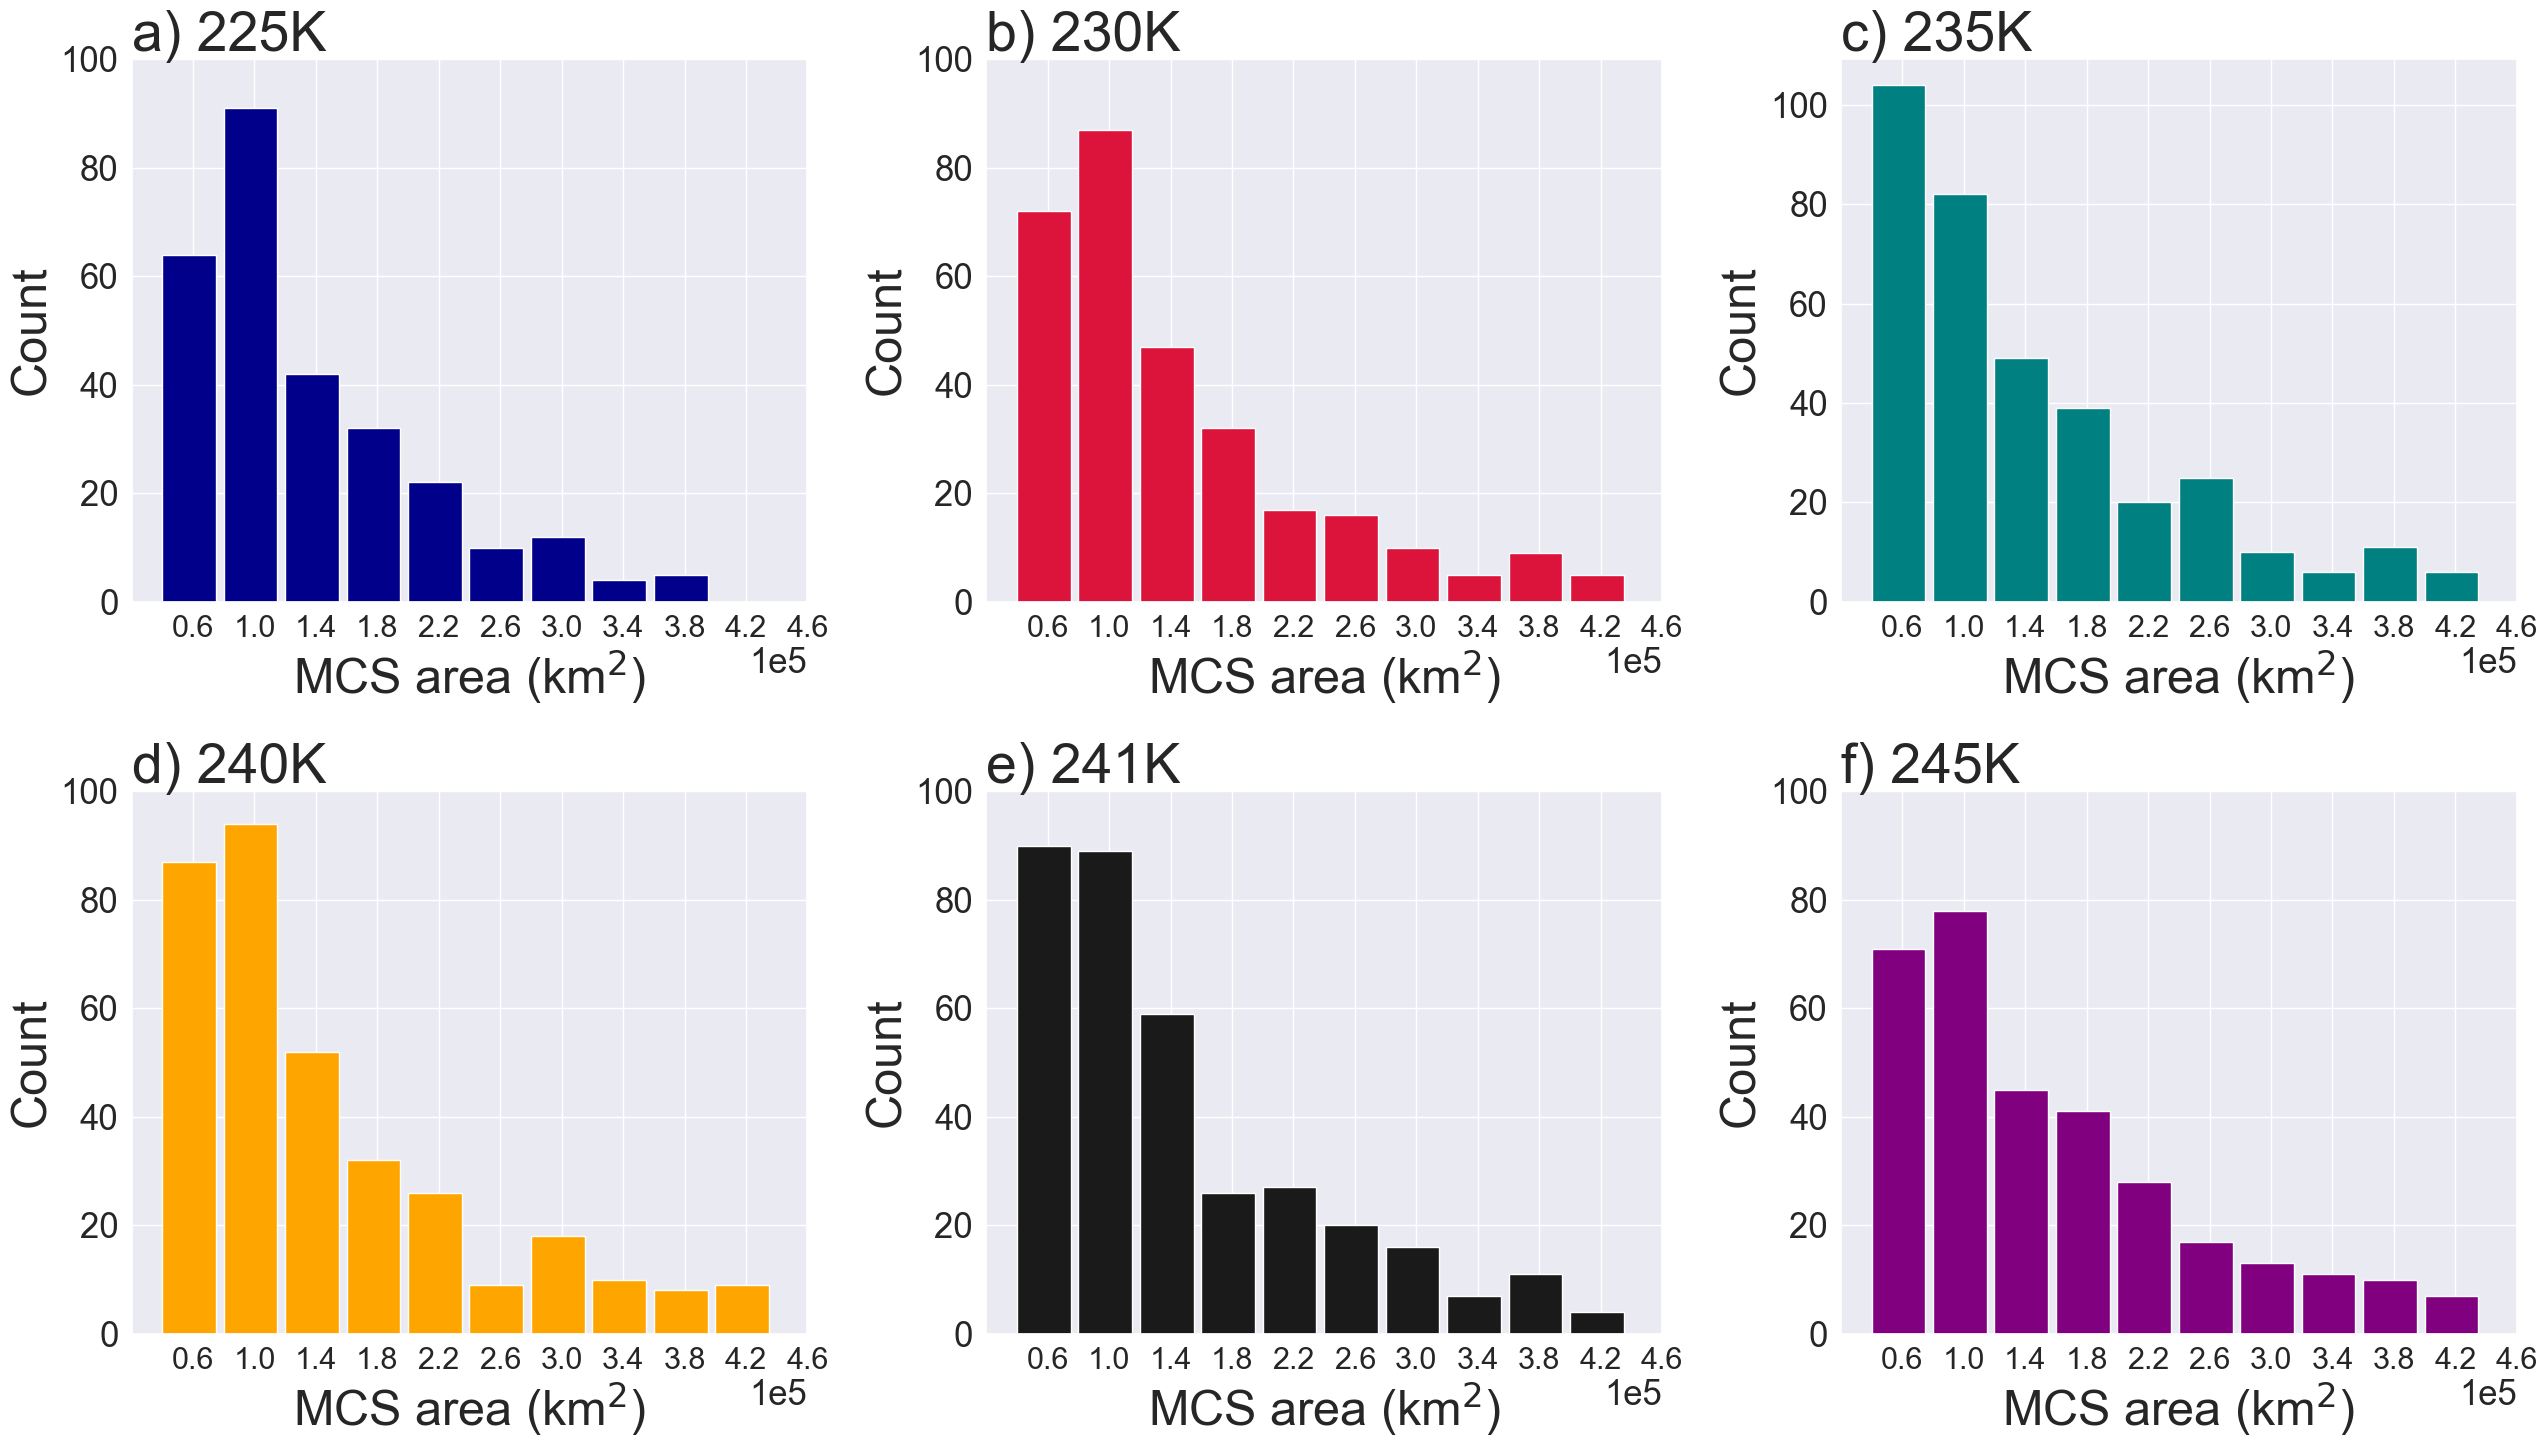

In [205]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=2)

fig = plt.figure(figsize=(26,15))
t = 40
f= 35
n = 25
lf= 15


ax1=plt.subplot(2,3,1)
ax1.set_title('a) 225K ', loc='left', fontsize= t )
ax1.hist(area_225,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'darkblue',align='mid')
ax1.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax1.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax1.set_yticks([0,20,40,60,80,100])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.xaxis.get_offset_text().set_fontsize(25)
ax1.set_ylabel('Count',fontsize=f)

ax2=plt.subplot(2,3,2)
ax2.set_title('b) 230K ', loc='left', fontsize= t )
ax2.hist(area_230,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'crimson',align='mid')
ax2.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax2.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax2.set_yticks([0,20,40,60,80,100])
ax2.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.xaxis.get_offset_text().set_fontsize(25)
ax2.set_ylabel('Count',fontsize=f)

ax3=plt.subplot(2,3,3)
ax3.set_title('c) 235K ', loc='left', fontsize= t)
ax3.hist(area_235,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'teal',align='mid')
ax3.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax3.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax3.set_yticks([0,20,40,60,80,100])
ax3.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.xaxis.get_offset_text().set_fontsize(25)
ax3.set_ylabel('Count',fontsize=f)

ax4=plt.subplot(2,3,4)
ax4.set_title('d) 240K ', loc='left', fontsize= t )
ax4.hist(area_240,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'orange',align='mid')
ax4.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax4.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax4.set_yticks([0,20,40,60,80,100])
ax4.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.xaxis.get_offset_text().set_fontsize(25)
ax4.set_ylabel('Count',fontsize=f)

ax5=plt.subplot(2,3,5)
ax5.set_title('e) 241K ', loc='left', fontsize= t )
ax5.hist(area_241,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'k',align='mid')
ax5.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax5.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax5.set_yticks([0,20,40,60,80,100])
ax5.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.xaxis.get_offset_text().set_fontsize(25)
ax5.set_ylabel('Count',fontsize=f)

ax6=plt.subplot(2,3,6)
ax6.set_title('f) 245K ', loc='left', fontsize= t )
ax6.hist(area_245,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'purple',align='mid')
ax6.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax6.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax6.set_yticks([0,20,40,60,80,100])
ax6.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.xaxis.get_offset_text().set_fontsize(25)
ax6.set_ylabel('Count',fontsize=f)

fig.tight_layout()
plt.savefig('Plot/Jan_2000/singleTb/area_hist_Tb_thresholds_Jan2000.png')


**Analysis of MCS velocity/propagation speed**

In [206]:
#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel_225= tobac.calculate_velocity(mcstracks_225, method_distance=None)
vel_230= tobac.calculate_velocity(mcstracks_230, method_distance=None)
vel_235= tobac.calculate_velocity(mcstracks_235, method_distance=None)
vel_240= tobac.calculate_velocity(mcstracks_240, method_distance=None)
vel_241= tobac.calculate_velocity(mcstracks_241, method_distance=None)
vel_245= tobac.calculate_velocity(mcstracks_245, method_distance=None)

In [207]:
velocity_225=functions.get_v(vel_225)
velocity_230=functions.get_v(vel_230)
velocity_235=functions.get_v(vel_235)
velocity_240=functions.get_v(vel_240)
velocity_241=functions.get_v(vel_241)
velocity_245=functions.get_v(vel_245)

propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


In [208]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    return bins

In [209]:
bins=20

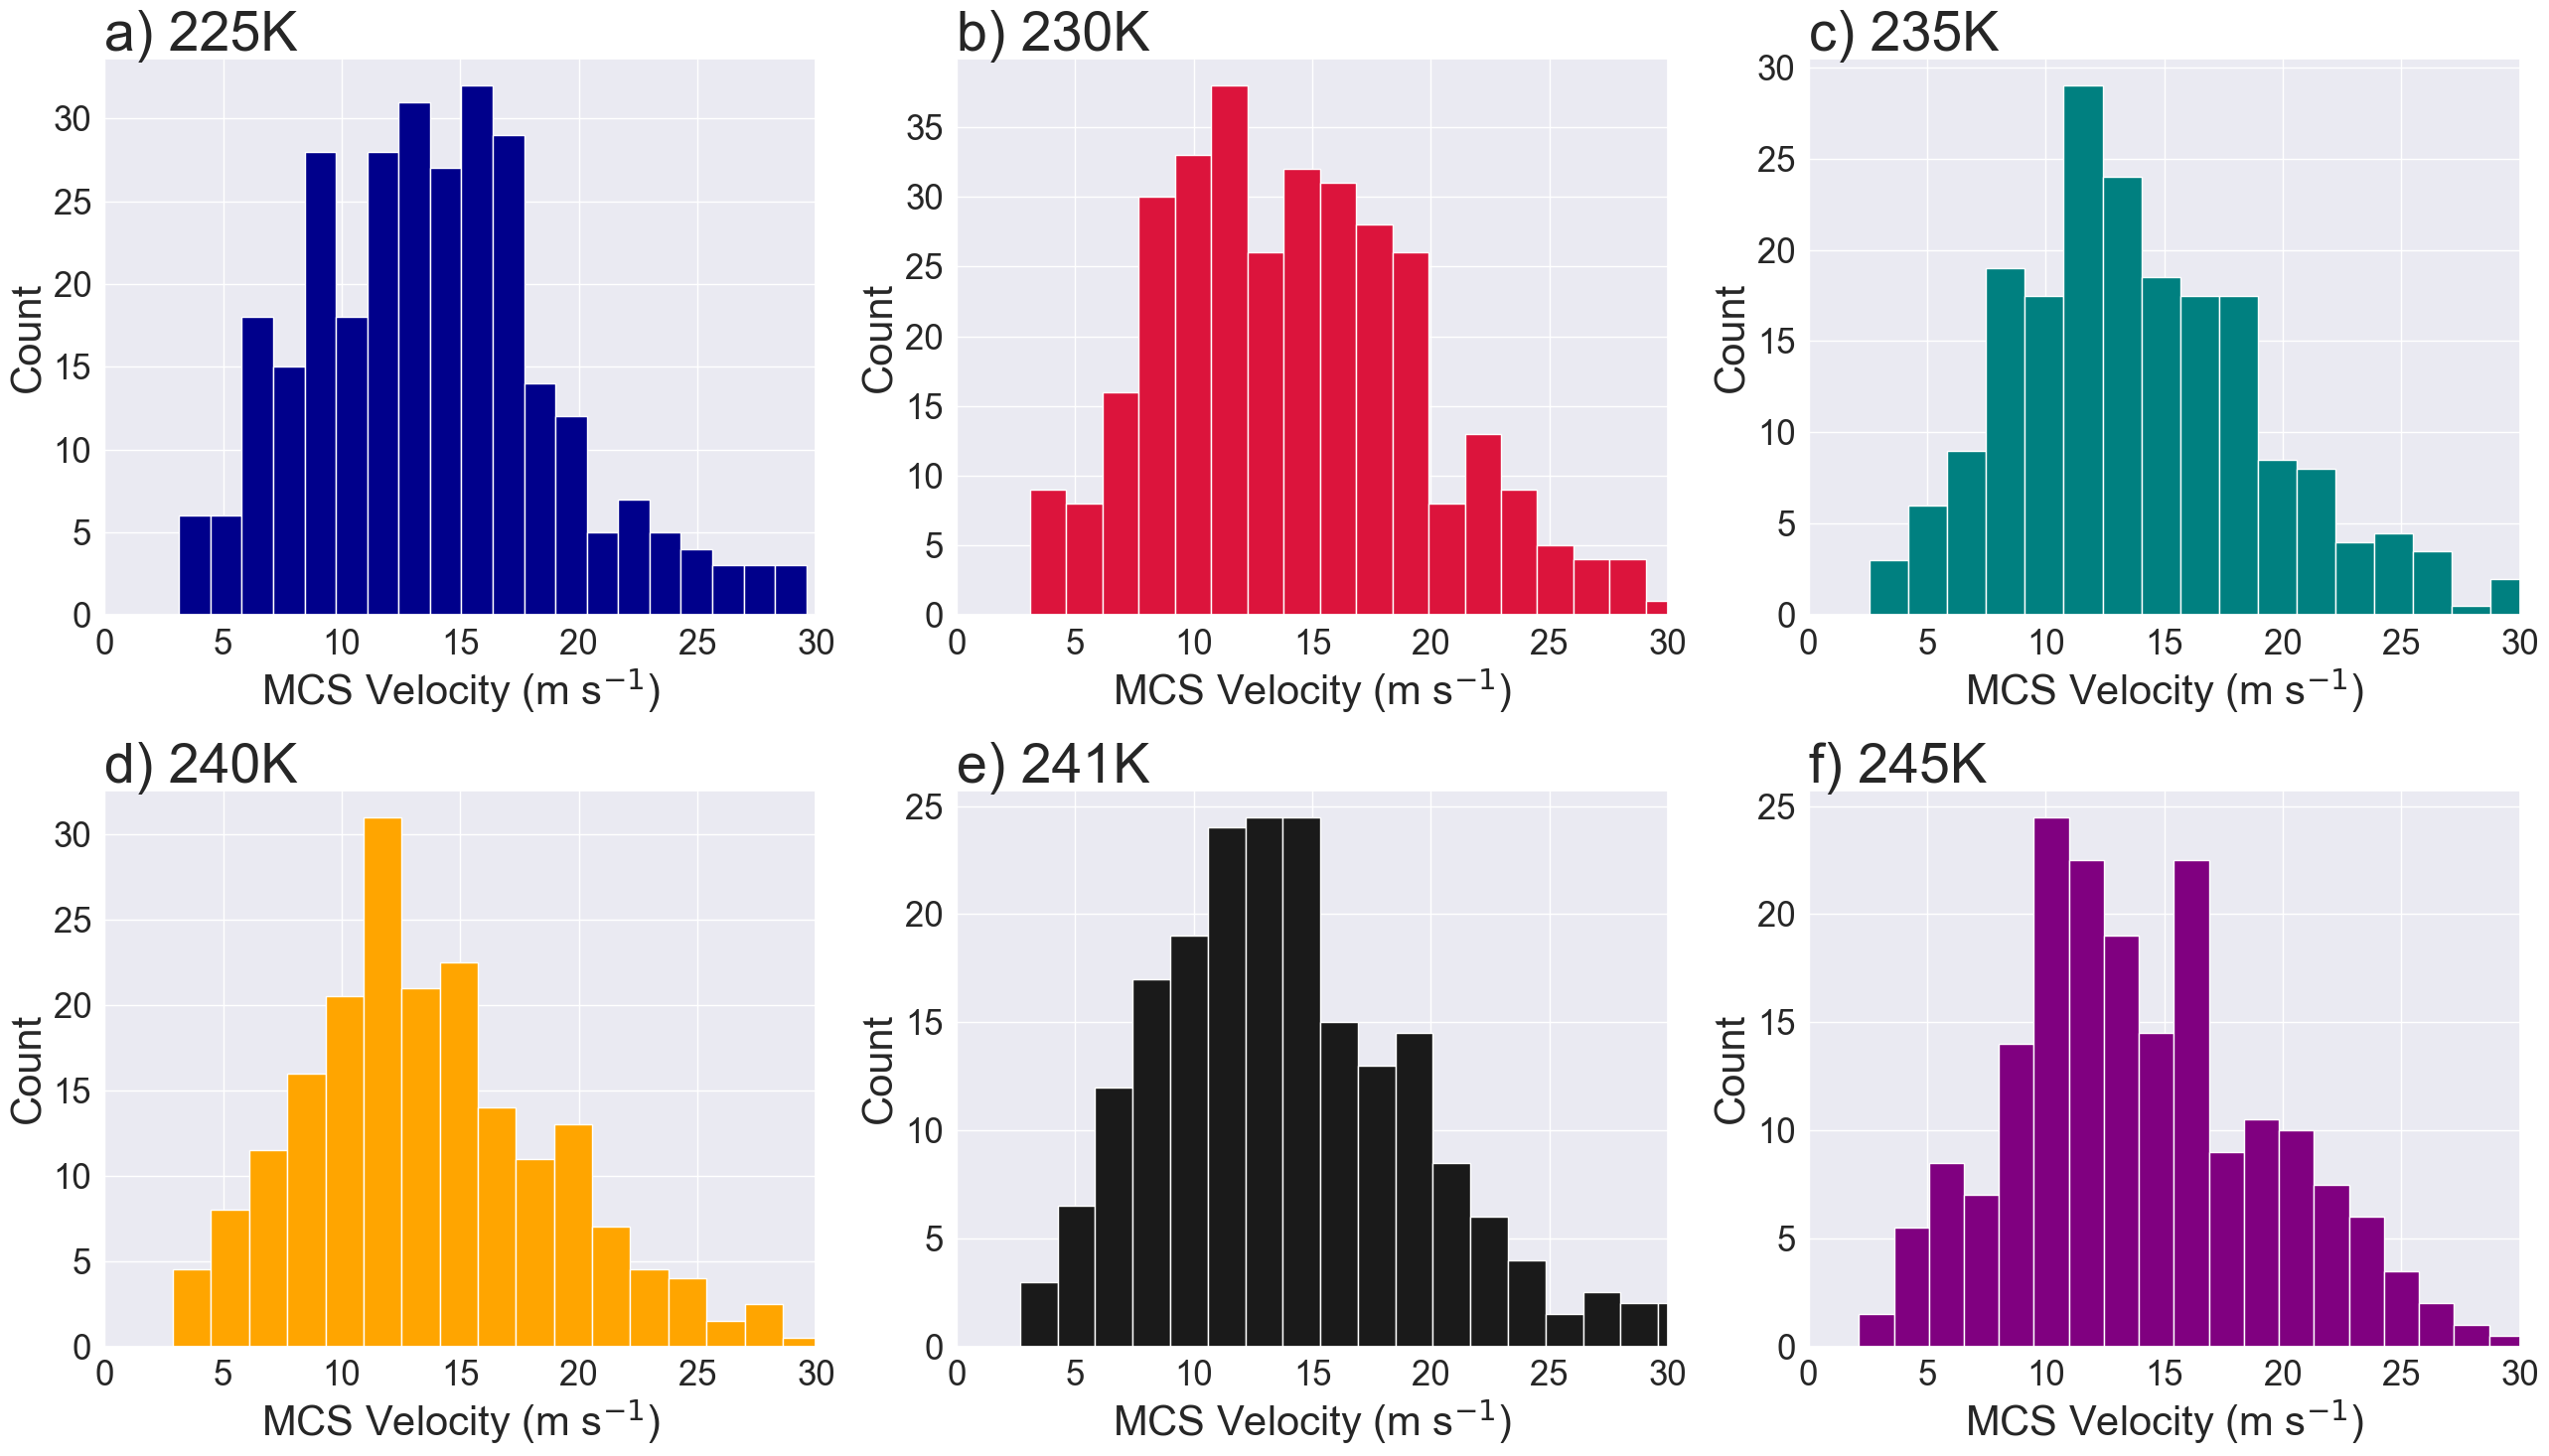

In [210]:
#plots of MCS velocity
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
t = 40
f= 30
n=25
lf= 35

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) 225K ', loc='left', fontsize= t)
bins=bins
ax1.hist(velocity_225, bins=bins,color='darkblue',align='mid')
ax1.set_xlim(0,30)
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax1.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax1.set_ylabel('Count',fontsize=f)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) 230K ', loc='left', fontsize= t)
bins = bins
ax2.hist(velocity_230, bins=bins,align='mid',color='crimson')
ax2.set_xlim(0,30)
ax2.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax2.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax2.set_ylabel('Count',fontsize=f)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) 235K ', loc='left', fontsize= t)
bins = bins
ax3.hist(velocity_235, bins=bins,align='mid',color='teal')
ax3.set_xlim(0,30)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax3.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax3.set_ylabel('Count',fontsize=f)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) 240K ', loc='left', fontsize= t)
bins = bins
ax4.hist(velocity_240, bins=bins,align='mid',color='orange')
ax4.set_xlim(0,30)
ax4.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax4.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax4.set_ylabel('Count',fontsize=f)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) 241K ', loc='left', fontsize= t)
bins = bins
ax5.hist(velocity_241, bins=bins,align='mid',color='k')
ax5.set_xlim(0,30)
ax5.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax5.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax5.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax5.set_ylabel('Count',fontsize=f)

ax6= plt.subplot(2,3,6)
ax6.set_title('f) 245K ', loc='left', fontsize= t)
bins = bins
ax6.hist(velocity_245, bins=bins,align='mid',color='purple')
ax6.set_xlim(0,30)
ax6.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax6.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax6.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax6.set_ylabel('Count',fontsize=f)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/singleTb/vel_hist_Tb_thresholds_Jan2000.png')



In [211]:
#code from the calculate lifetime function in tobac but here I've taken it out of the function so that it's easier to 
#apply to histograms, means, max and mins. It has also been converted from minutes to hours

bin_edges=np.arange(6,30,2)
density=False

mcstracks_225_cell = mcstracks_225.groupby("cell")
minutes_225 = (mcstracks_225_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_225 = minutes_225/60 #converting from minutes to hours

mcstracks_230_cell = mcstracks_230.groupby("cell")
minutes_230 = (mcstracks_230_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_230 = minutes_230/60

mcstracks_235_cell = mcstracks_235.groupby("cell")
minutes_235 = (mcstracks_235_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_235 = minutes_235/60

mcstracks_240_cell = mcstracks_240.groupby("cell")
minutes_240 = (mcstracks_240_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_240 = minutes_240/60

mcstracks_241_cell = mcstracks_241.groupby("cell")
minutes_241 = (mcstracks_241_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_241 = minutes_241/60

mcstracks_245_cell = mcstracks_245.groupby("cell")
minutes_245 = (mcstracks_245_cell["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_245 = minutes_245/60


In [212]:
lifetime_240

array([743.,  20.,  15.,   7.,   6.,   6.,  17.,   6.,  16.,   7.,   7.,
         8.,  10.,  15.,  14.,   6.,  10.,   7.,   9.,   6.,  12.,   8.,
         9.,   9.,  75.,  15.,   6.,  15.,   8.,  14.,   6.,   8.,   7.,
         9.,   7.,   6.,   8.,  11.,   7.,   8.,   6.,  11.,   7.,  14.,
         6.,   8.,  14.,   7.,  13.,  21.,  14.,   8.,   6.,  16.,   9.,
         7.,   7.,  18.,  10.,  12.,   6.,   7.,   8.,   8.,   6.,  10.,
         9.,   8.,  11.,   9.,  46.,   6.,  11.,   8.,  10.,   6.,   8.,
        11.,  20.,   9.,   9.,   6.,   6.,   7.,   7.,   6.,  27.,   9.,
        29.,  10.,  55.,  10.,   9.,  11.,  27.,   8.,   6.,   6.,  11.,
        10.,   7.,   9.,  12.,  10.,   7.,   6.,   6.,   9.,  14.,  11.,
         9.,  13.,  18.,  14.,   7.,  26.,   7.,  47.,   6.,  13.,  11.,
        26.,  13.,  14.,   8.,  11.,   7.,  12.,  11.,  17.,   8.,  11.,
         9.,  11.,  14.,  13.,   6.,  12.,  21.,   9.,   6.,   6.,  18.,
        17.,   9.,  37.,  10.,   6.,   9.,   7.,  1

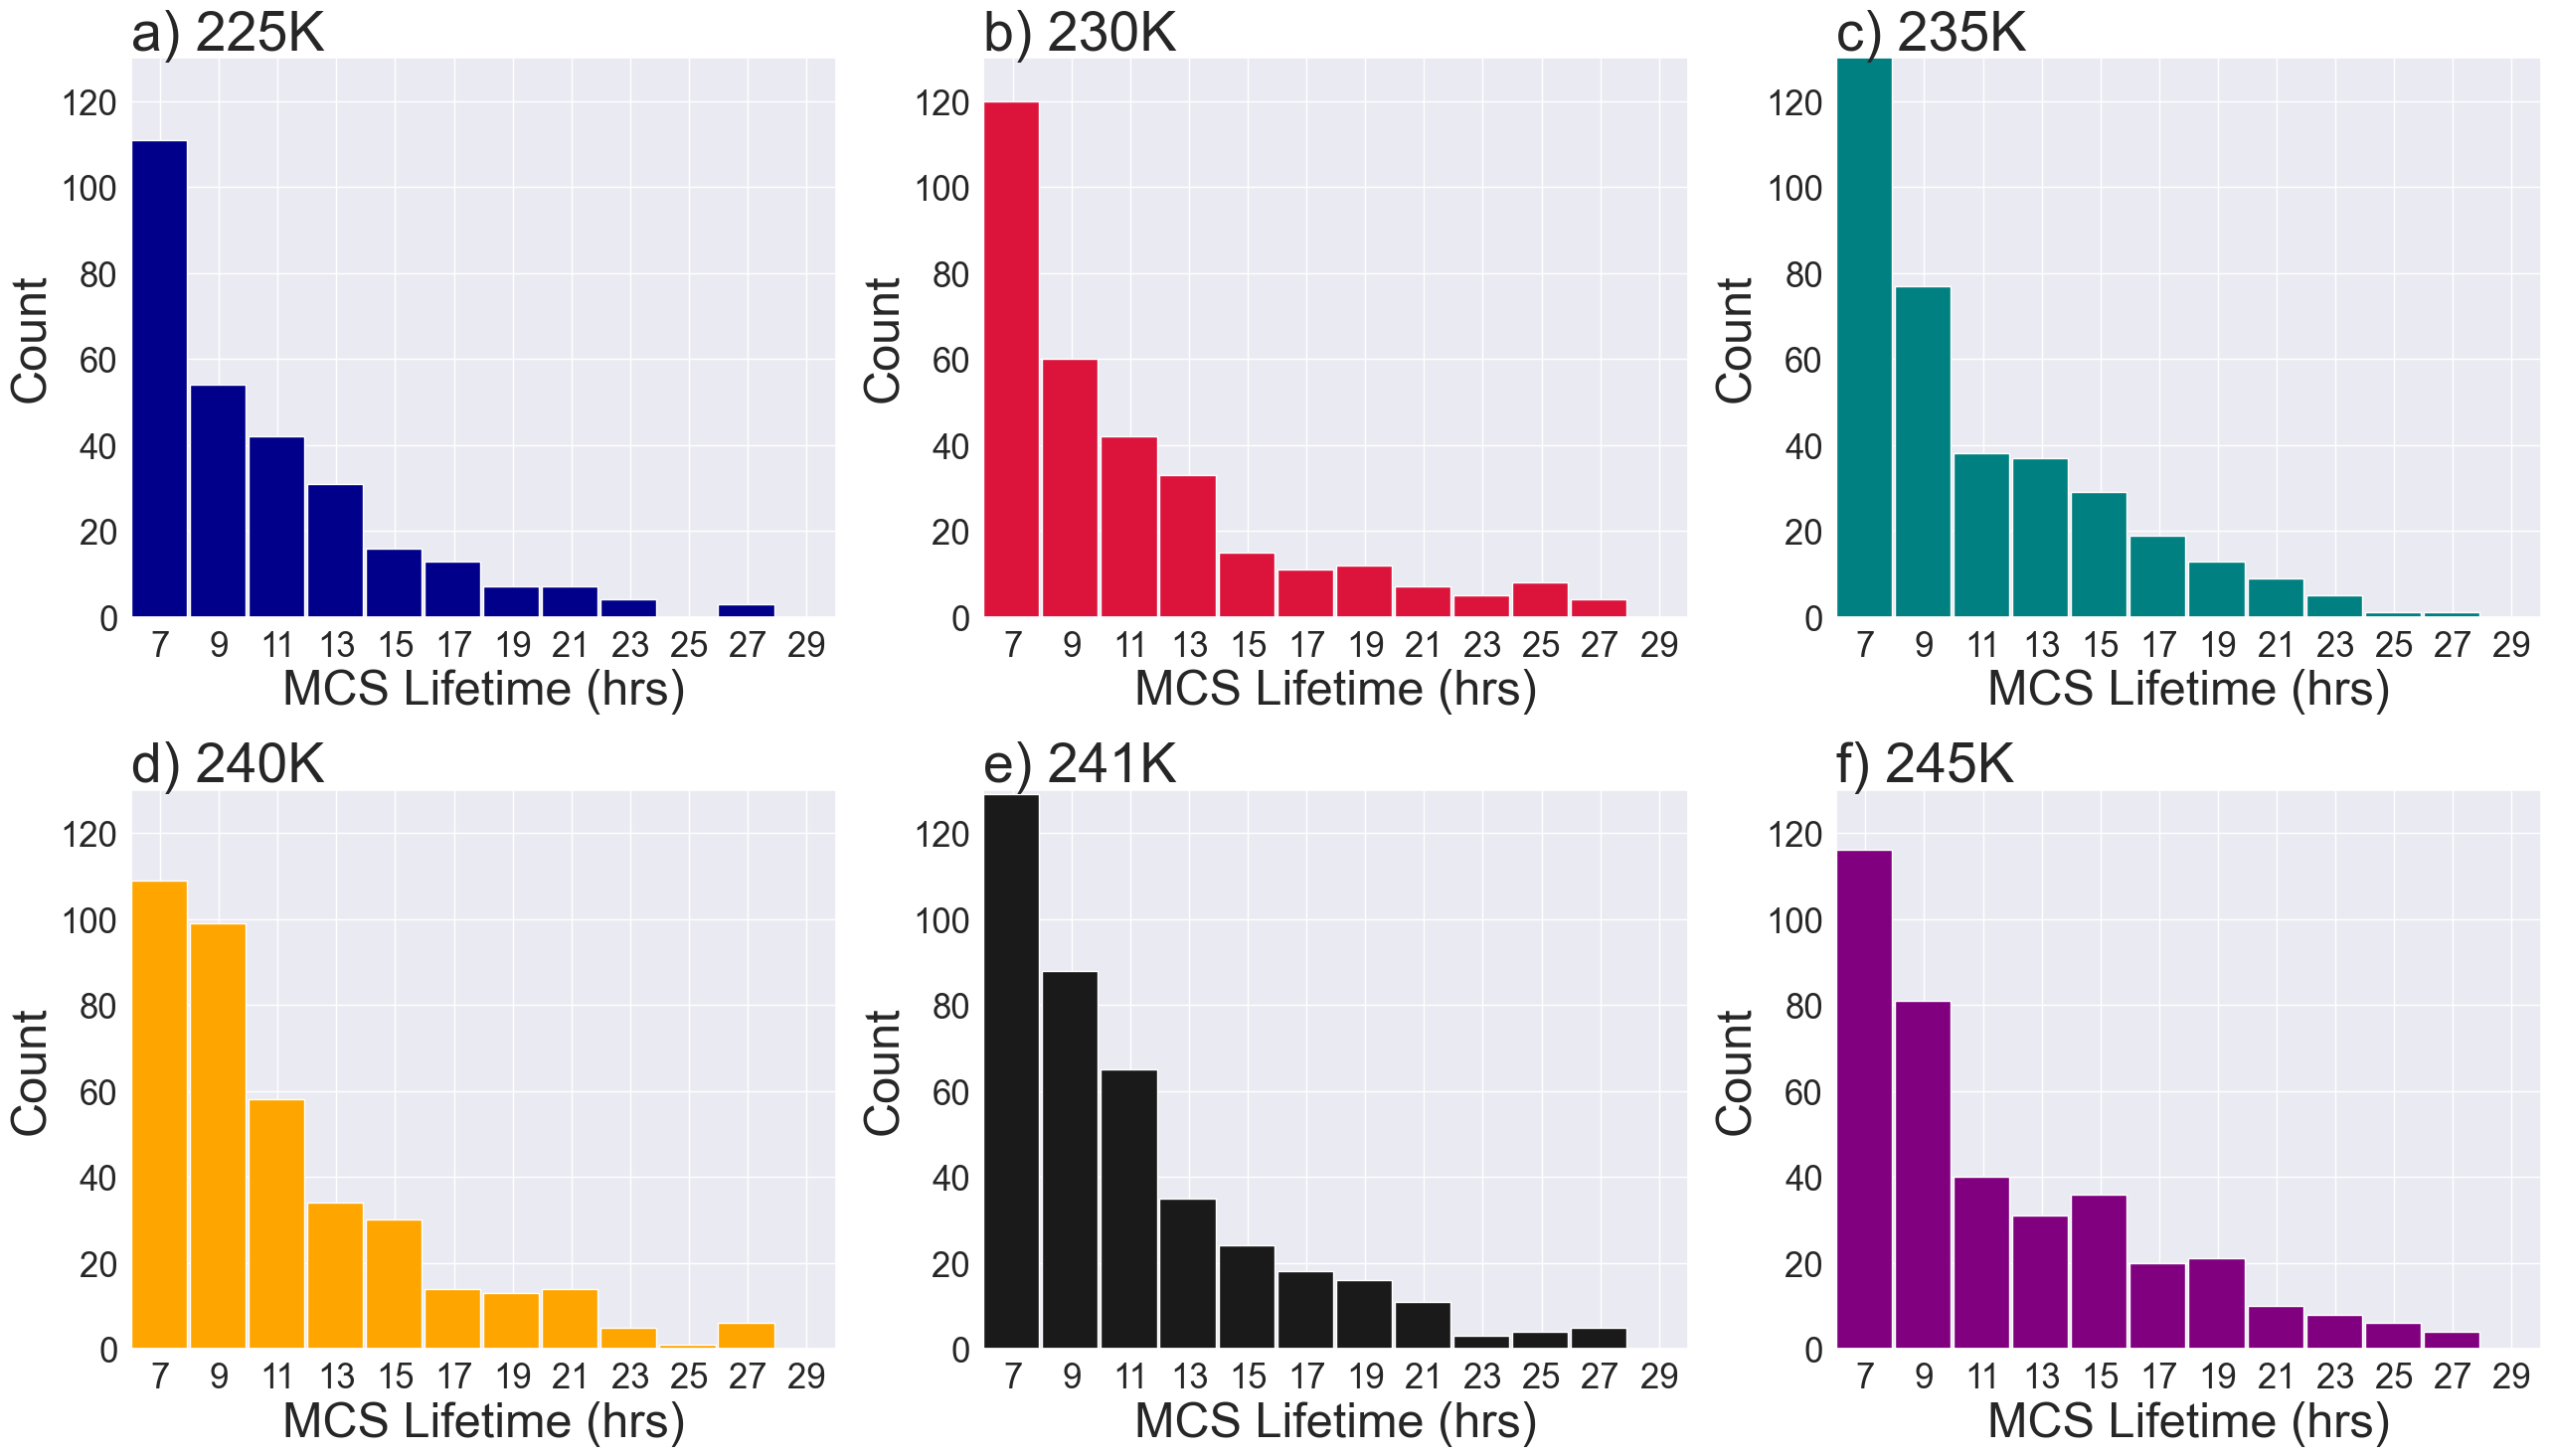

In [213]:
#plots of MCS lifetime
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
f= 40
lf = 35
l = 25

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) 225K ', loc='left', fontsize= f)
bins=bin_edges
ax1.hist(lifetime_225, bins=bin_edges,color='darkblue',align='mid',width=1.9)
ax1.set_xlim(6,30)
ax1.set_ylim(0,130)
ax1.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax1.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax1.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax1.set_ylabel('Count',fontsize=lf)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) 230K ', loc='left', fontsize= f)
bins = bin_edges
ax2.hist(lifetime_230, bins=bin_edges,align='mid',color='crimson',width=1.9)
ax2.set_xlim(6,30)
ax2.set_ylim(0,130)
ax2.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax2.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax2.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax2.set_ylabel('Count',fontsize=lf)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) 235K ', loc='left', fontsize= f)
bins = bin_edges
ax3.hist(lifetime_235, bins=bin_edges,align='mid',color='teal',width=1.9)
ax3.set_xlim(6,30)
ax3.set_ylim(0,130)
ax3.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax3.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax3.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax3.set_ylabel('Count',fontsize=lf)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) 240K ', loc='left', fontsize= f)
bins = bin_edges
ax4.hist(lifetime_240, bins=bin_edges,align='mid',color='orange',width=1.9)
ax4.set_xlim(6,30)
ax4.set_ylim(0,130)
ax4.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax4.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax4.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax4.set_ylabel('Count',fontsize=lf)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) 241K ', loc='left', fontsize= f)
bins = bin_edges
ax5.hist(lifetime_241, bins=bin_edges,align='mid',color='k',width=1.9)
ax5.set_xlim(6,30)
ax5.set_ylim(0,130)
ax5.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax5.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax5.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax5.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax5.set_ylabel('Count',fontsize=lf)

ax6= plt.subplot(2,3,6)
ax6.set_title('f) 245K ', loc='left', fontsize= f)
bins = bin_edges
ax6.hist(lifetime_245, bins=bin_edges,align='mid',color='purple',width=1.9)
ax6.set_xlim(6,30)
ax6.set_ylim(0,130)
ax6.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax6.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax6.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax6.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax6.set_ylabel('Count',fontsize=lf)

plt.tight_layout()

plt.savefig('Plot/Jan_2000/singleTb/lifetime_hist_Tb_thresholds_Jan2000.png')

